In [2]:
# Importamos las librerias necesarias
import torch
import torchvision
import torch.nn as nn
import os
import glob as gb
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random 
from PIL import Image
from skimage import io
from skimage.transform import resize
from tqdm import tqdm
import pandas as pd 
import albumentations as A
from scipy.io import loadmat
# from pathlib import Path

# Verificaremos si tenemos GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=57a915511c45f1c7ea0a8be35fcd1c4abbd1b00862dd88574a5f10b5cd1b348c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
# Descargamos el dataset
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
# url = 'https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/UCMerced_LandUse.zip'
wget.download(url)

'images.tar'

In [ ]:
# Imagenes en .mat train images
# url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/train_data.mat'
# wget.download(url)
# http://vision.stanford.edu/aditya86/ImageNetDogs/train_data.mat

In [ ]:
# Imagenes para evaluar
# url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/test_data.mat'
# wget.download(url)

In [ ]:
# dataT = loadmat(os.path.join('./', 'train_data.mat'))
# dataE = loadmat(os.path.join('./', 'test_data.mat'))

In [5]:
# Descomprimimos las imagenes del dataset descargado
!tar -xf images.tar  

In [ ]:
# url = 'https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/UCMerced_LandUse.zip'
# wget.download(url)

In [ ]:
# Descomprimir
# import zipfile
# with zipfile.ZipFile('UCMerced_LandUse.zip', 'r') as zip_ref:
#     zip_ref.extractall('.')

In [ ]:
# PATH = '/content/dataset/Images'

# classes = os.listdir(PATH)
# classes

In [6]:
PATH = '/content/Images'

classes = os.listdir(PATH)  # Nombra las clases por directorios existentes
classes

['n02105162-malinois',
 'n02085782-Japanese_spaniel',
 'n02101556-clumber',
 'n02090721-Irish_wolfhound',
 'n02107683-Bernese_mountain_dog',
 'n02100735-English_setter',
 'n02093991-Irish_terrier',
 'n02113186-Cardigan',
 'n02089973-English_foxhound',
 'n02099429-curly-coated_retriever',
 'n02087046-toy_terrier',
 'n02088364-beagle',
 'n02094258-Norwich_terrier',
 'n02086646-Blenheim_spaniel',
 'n02092002-Scottish_deerhound',
 'n02089078-black-and-tan_coonhound',
 'n02085620-Chihuahua',
 'n02109047-Great_Dane',
 'n02100877-Irish_setter',
 'n02101388-Brittany_spaniel',
 'n02091032-Italian_greyhound',
 'n02102318-cocker_spaniel',
 'n02110185-Siberian_husky',
 'n02096585-Boston_bull',
 'n02095314-wire-haired_fox_terrier',
 'n02107312-miniature_pinscher',
 'n02100583-vizsla',
 'n02109961-Eskimo_dog',
 'n02113978-Mexican_hairless',
 'n02113799-standard_poodle',
 'n02113023-Pembroke',
 'n02107574-Greater_Swiss_Mountain_dog',
 'n02086910-papillon',
 'n02102973-Irish_water_spaniel',
 'n0209713

In [7]:
imgs, labels = [], []     # Creamos el dataset de reatures y sus labels

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: n02105162-malinois. Imágenes: 150
Categoría: n02085782-Japanese_spaniel. Imágenes: 185
Categoría: n02101556-clumber. Imágenes: 150
Categoría: n02090721-Irish_wolfhound. Imágenes: 218
Categoría: n02107683-Bernese_mountain_dog. Imágenes: 218
Categoría: n02100735-English_setter. Imágenes: 161
Categoría: n02093991-Irish_terrier. Imágenes: 169
Categoría: n02113186-Cardigan. Imágenes: 155
Categoría: n02089973-English_foxhound. Imágenes: 157
Categoría: n02099429-curly-coated_retriever. Imágenes: 151
Categoría: n02087046-toy_terrier. Imágenes: 172
Categoría: n02088364-beagle. Imágenes: 195
Categoría: n02094258-Norwich_terrier. Imágenes: 185
Categoría: n02086646-Blenheim_spaniel. Imágenes: 188
Categoría: n02092002-Scottish_deerhound. Imágenes: 232
Categoría: n02089078-black-and-tan_coonhound. Imágenes: 159
Categoría: n02085620-Chihuahua. Imágenes: 152
Categoría: n02109047-Great_Dane. Imágenes: 156
Categoría: n02100877-Irish_setter. Imágenes: 155
Categoría: n02101388-Brittany_spaniel.

In [ ]:
# Reescalamos las imagenes de salida
# train_imgs = []
# for i in imgs:
#   image = plt.imread(i)
#   convert = np.array(image)
#   train_imgs.append(resize(convert,(100,100)))

In [8]:
# Para verificar si todos tienen 3 canales
imgsN = []
labelsN = []
for i,x in enumerate(imgs):
  imageMat = io.imread(x)
  if imageMat.shape[2] != 3:
    print("No tiene tres dimensiones")
    no3dim = imageMat
    ruta4dim = x
    print((imageMat.shape))
  else:
    imgsN += [x]
    labelsN += [labels[i]]
    # print(labels[i])


No tiene tres dimensiones
(189, 213, 4)


/content/Images/n02105855-Shetland_sheepdog/n02105855_2933.jpg


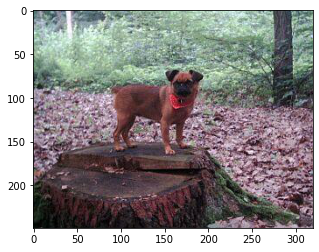

In [9]:
# Ruta de la imagen con 4 canales
plt.imshow(imageMat)
print(ruta4dim)

In [10]:
len(imgsN), len(labelsN)

(20579, 20579)

In [11]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgsN, labelsN, test_size=0.2, shuffle=True, stratify=labelsN)
# test_imgs = imgs
# test_imgs = imgs
len(train_imgs), len(test_imgs)

(16463, 4116)

In [12]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  # def __getitem__(self, ix):
  #   # cargar la imágen
  #   img = io.imread(self.X[ix])
  #   # aplicar transformaciones
  #   if self.trans:
  #     img = self.trans(image=img)["image"]
  #   return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])
  def __getitem__(self, ix):
      img = io.imread(self.X[ix]) 
      label = self.y[ix]
      img = self.trans(image=img)['image']         
      return torch.from_numpy(img / 255.).permute(2,0,1).float(), torch.tensor(label).long()

In [13]:
# Descargamos el dataset de MNSTFASHION
trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device), 
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(16463, 4116)

In [14]:
# Preparamos nuestro dataset dataloader para enviar al modelo
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=64, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 224, 224])

In [15]:
# Funcion de Fit de entrenamiento
def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")



---

# Sección ResNet 

In [ ]:
# Funcion de capas de redes convolucionanales activacion y maxpool
def layerSequential(c_in, c_out, k=3, s=1, p=1, pk=2, ps=2, bias=False):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s, bias=bias),
        torch.nn.BatchNorm2d(c_out),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv2d(c_out, c_out, k, padding=p, stride=s, bias=bias),
        torch.nn.BatchNorm2d(c_out),
        # ======================================
        torch.nn.Conv2d(c_out, c_out, k, padding=p, stride=s, bias=bias),
        torch.nn.BatchNorm2d(c_out),
        torch.nn.ReLU(inplace=True),
        torch.nn.Conv2d(c_out, c_out, k, padding=p, stride=s, bias=bias),
        torch.nn.BatchNorm2d(c_out)
    )
# Funcion de capa lineal para la salida
def classificLinear(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )
# Modelo de neuronal
class ResNET(torch.nn.Module):
  def __init__(self, n_classes, n_channels=3):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.bn1   = nn.BatchNorm2d(64)
    self.relu   = nn.ReLU(64)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    self.layer1 = layerSequential(64, 8) # 64, 64
    self.layer2 = layerSequential(8, 16)  # 64, 128
    self.layer3 = layerSequential(16, 32) # 128, 256
    self.layer4 = layerSequential(32, 64) # 256, 512
    self.avgpool = nn.AdaptiveAvgPool2d((1,1))
    self.fc1 = classificLinear(64, 500)    # 512, 1000   224->112->56
    # self.fc1 = nn.Linear(64, 1000)
    # self.fc2_loc = nn.Linear(10, 4)
    self.fc2_cls = nn.Linear(500, n_classes)

  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)

    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)

    x = self.avgpool(x)
    x = x.view(x.shape[0], -1)  # Estiramos la matriz a un vector de 1 dim
    x = self.fc1(x)            # Le  pasamos a red lineal
    # x_loc = self.fc2_loc(x)
    x_cls = self.fc2_cls(x)      # Numero de clases
    # return x_loc, x_cls
    return x_cls

In [ ]:
# Instanciamos el modelo y pasamos un tensor
model = ResNET(n_classes = len(classes))
# output_loc, output_cls = model(torch.randn(64, 3, 224, 224))
output_cls = model(torch.randn(64, 3, 224, 224))
output_cls.shape

In [ ]:
# Entrenamos en modelo instanciando la clase RestNet
model = ResNET(n_classes = len(classes))
fit(model, dataloader, epochs=5)

In [ ]:
# Evaluamos el modelo con los datos de evaluacion o test
model.to(device)
model.eval()
with torch.no_grad():
  bar = tqdm(dataloader['test'])
  test_acc = []
  for imgs, labs in bar:
    imgs, labs = imgs.to(device), labs.to(device)
    y_hat = model(imgs)
    acc = (torch.argmax(y_hat, axis=1) == labs).sum().item() / len(labs)
    test_acc.append(acc)
  print(f' acc {np.mean(test_acc):.5f}')

In [ ]:
# Prediciendo
r, c = 5, 10
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test'])-1)
        img, label = dataset['test'][ix]
        y_hat = model(img.unsqueeze(0).to(device))
        lab = torch.argmax(y_hat, axis=1)[0].item()
        plt.imshow(img.permute(1,2,0))
        plt.title(f'{label}/{lab}', color="red" if label != lab else "green")
        plt.axis("off")
plt.tight_layout()
plt.show()
# ['Bolsas800x600', 'Metales800x600', 'Envases800v600']

# ResNet Original

In [21]:
import torch
import torch.nn as nn


class block(nn.Module):
    def __init__(
        self, in_channels, intermediate_channels, identity_downsample=None, stride=1
    ):
        super(block, self).__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(
            in_channels, intermediate_channels, kernel_size=1, stride=1, padding=0, bias=False
        )
        self.bn1 = nn.BatchNorm2d(intermediate_channels)
        self.conv2 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False
        )
        self.bn2 = nn.BatchNorm2d(intermediate_channels)
        self.conv3 = nn.Conv2d(
            intermediate_channels,
            intermediate_channels * self.expansion,
            kernel_size=1,
            stride=1,
            padding=0,
            bias=False
        )
        self.bn3 = nn.BatchNorm2d(intermediate_channels * self.expansion)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample
        self.stride = stride

    def forward(self, x):
        identity = x.clone()

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)

        x += identity
        x = self.relu(x)
        return x


class ResNet(nn.Module):
    def __init__(self, block, layers, image_channels, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Essentially the entire ResNet architecture are in these 4 lines below
        self.layer1 = self._make_layer(
            block, layers[0], intermediate_channels=64, stride=1
        )
        self.layer2 = self._make_layer(
            block, layers[1], intermediate_channels=64, stride=2
        )
        self.layer3 = self._make_layer(
            block, layers[2], intermediate_channels=64, stride=2
        )
        self.layer4 = self._make_layer(
            block, layers[3], intermediate_channels=64, stride=2
        )

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64 * 4, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, num_residual_blocks, intermediate_channels, stride):
        identity_downsample = None
        layers = []

        # Either if we half the input space for ex, 56x56 -> 28x28 (stride=2), or channels changes
        # we need to adapt the Identity (skip connection) so it will be able to be added
        # to the layer that's ahead
        if stride != 1 or self.in_channels != intermediate_channels * 4:
            identity_downsample = nn.Sequential(
                nn.Conv2d(
                    self.in_channels,
                    intermediate_channels * 4,
                    kernel_size=1,
                    stride=stride,
                    bias=False
                ),
                nn.BatchNorm2d(intermediate_channels * 4),
            )

        layers.append(
            block(self.in_channels, intermediate_channels, identity_downsample, stride)
        )

        # The expansion size is always 4 for ResNet 50,101,152
        self.in_channels = intermediate_channels * 4

        # For example for first resnet layer: 256 will be mapped to 64 as intermediate layer,
        # then finally back to 256. Hence no identity downsample is needed, since stride = 1,
        # and also same amount of channels.
        for i in range(num_residual_blocks - 1):
            layers.append(block(self.in_channels, intermediate_channels))

        return nn.Sequential(*layers)

def ResNet50(img_channel=3, num_classes=1000):
    return ResNet(block, [3, 4, 6, 3], img_channel, num_classes)


In [22]:
# instancia y pueba con un tensor del model ResNet50
model = ResNet50(num_classes = len(classes))
# output_loc, output_cls = model(torch.randn(64, 3, 224, 224))
output_cls = model(torch.randn(64, 3, 224, 224))
output_cls.shape

torch.Size([64, 120])

In [23]:
# Entrenamos en modelo instanciando la clase RestNet
model = ResNet50(num_classes = len(classes))
fit(model, dataloader, epochs=30)

val_loss 4.62918 val_acc 0.02889: 100%|██████████| 65/65 [00:34<00:00,  1.88it/s]


Epoch 1/30 loss 4.70184 val_loss 4.62918 acc 0.01968 val_acc 0.02889


val_loss 4.94701 val_acc 0.03274: 100%|██████████| 65/65 [00:34<00:00,  1.87it/s]


Epoch 2/30 loss 4.37181 val_loss 4.94701 acc 0.03987 val_acc 0.03274


val_loss 6.69977 val_acc 0.01442: 100%|██████████| 65/65 [00:34<00:00,  1.88it/s]


Epoch 3/30 loss 4.13370 val_loss 6.69977 acc 0.06000 val_acc 0.01442


val_loss 4.06290 val_acc 0.07731: 100%|██████████| 65/65 [00:35<00:00,  1.85it/s]


Epoch 4/30 loss 3.95033 val_loss 4.06290 acc 0.08150 val_acc 0.07731


val_loss 4.53367 val_acc 0.06303: 100%|██████████| 65/65 [00:34<00:00,  1.87it/s]


Epoch 5/30 loss 3.77826 val_loss 4.53367 acc 0.10288 val_acc 0.06303


val_loss 4.35230 val_acc 0.07534: 100%|██████████| 65/65 [00:34<00:00,  1.86it/s]


Epoch 6/30 loss 3.62748 val_loss 4.35230 acc 0.11852 val_acc 0.07534


val_loss 3.76337 val_acc 0.12202: 100%|██████████| 65/65 [00:34<00:00,  1.86it/s]


Epoch 7/30 loss 3.45643 val_loss 3.76337 acc 0.14929 val_acc 0.12202


val_loss 3.81003 val_acc 0.11726: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]


Epoch 8/30 loss 3.27508 val_loss 3.81003 acc 0.18202 val_acc 0.11726


val_loss 3.64232 val_acc 0.14495: 100%|██████████| 65/65 [00:33<00:00,  1.91it/s]


Epoch 9/30 loss 3.11591 val_loss 3.64232 acc 0.20195 val_acc 0.14495


val_loss 3.83337 val_acc 0.11269: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]


Epoch 10/30 loss 2.94289 val_loss 3.83337 acc 0.23513 val_acc 0.11269


val_loss 4.28890 val_acc 0.12846: 100%|██████████| 65/65 [00:34<00:00,  1.90it/s]


Epoch 11/30 loss 2.78007 val_loss 4.28890 acc 0.26640 val_acc 0.12846


val_loss 3.89446 val_acc 0.15668: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 12/30 loss 2.59738 val_loss 3.89446 acc 0.30336 val_acc 0.15668


val_loss 3.93176 val_acc 0.13106: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 13/30 loss 2.41965 val_loss 3.93176 acc 0.34351 val_acc 0.13106


val_loss 3.45080 val_acc 0.19639: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]


Epoch 14/30 loss 2.24424 val_loss 3.45080 acc 0.37971 val_acc 0.19639


val_loss 3.72603 val_acc 0.18264: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 15/30 loss 2.04885 val_loss 3.72603 acc 0.42376 val_acc 0.18264


val_loss 3.92563 val_acc 0.21197: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]


Epoch 16/30 loss 1.85024 val_loss 3.92563 acc 0.46902 val_acc 0.21197


val_loss 3.70577 val_acc 0.21284: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 17/30 loss 1.63697 val_loss 3.70577 acc 0.51623 val_acc 0.21284


val_loss 4.61643 val_acc 0.18409: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]


Epoch 18/30 loss 1.45594 val_loss 4.61643 acc 0.56452 val_acc 0.18409


val_loss 3.86848 val_acc 0.23966: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 19/30 loss 1.25022 val_loss 3.86848 acc 0.61779 val_acc 0.23966


val_loss 4.14058 val_acc 0.21870: 100%|██████████| 65/65 [00:33<00:00,  1.95it/s]


Epoch 20/30 loss 1.07340 val_loss 4.14058 acc 0.66848 val_acc 0.21870


val_loss 3.91997 val_acc 0.23034: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]


Epoch 21/30 loss 0.89700 val_loss 3.91997 acc 0.72336 val_acc 0.23034


val_loss 4.58593 val_acc 0.22452: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 22/30 loss 0.78872 val_loss 4.58593 acc 0.75599 val_acc 0.22452


val_loss 4.18761 val_acc 0.24130: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]


Epoch 23/30 loss 0.70186 val_loss 4.18761 acc 0.77981 val_acc 0.24130


val_loss 4.76762 val_acc 0.20250: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]


Epoch 24/30 loss 0.57964 val_loss 4.76762 acc 0.81902 val_acc 0.20250


val_loss 5.07218 val_acc 0.21817: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]


Epoch 25/30 loss 0.54532 val_loss 5.07218 acc 0.82951 val_acc 0.21817


val_loss 5.24273 val_acc 0.21510: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]


Epoch 26/30 loss 0.48356 val_loss 5.24273 acc 0.84740 val_acc 0.21510


val_loss 5.13698 val_acc 0.22726: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]


Epoch 27/30 loss 0.44000 val_loss 5.13698 acc 0.86082 val_acc 0.22726


val_loss 5.40909 val_acc 0.22764: 100%|██████████| 65/65 [00:34<00:00,  1.87it/s]


Epoch 28/30 loss 0.38733 val_loss 5.40909 acc 0.87919 val_acc 0.22764


val_loss 5.86404 val_acc 0.20856: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]


Epoch 29/30 loss 0.34004 val_loss 5.86404 acc 0.89373 val_acc 0.20856


val_loss 5.57866 val_acc 0.21803: 100%|██████████| 65/65 [00:33<00:00,  1.95it/s]

Epoch 30/30 loss 0.41312 val_loss 5.57866 acc 0.86855 val_acc 0.21803


In [24]:
# Evaluamos el modelo con los datos de evaluacion o test
model.to(device)
model.eval()
with torch.no_grad():
  bar = tqdm(dataloader['test'])
  test_acc = []
  for imgs, labs in bar:
    imgs, labs = imgs.to(device), labs.to(device)
    y_hat = model(imgs)
    acc = (torch.argmax(y_hat, axis=1) == labs).sum().item() / len(labs)
    test_acc.append(acc)
  print(f' acc {np.mean(test_acc):.5f}')

100%|██████████| 65/65 [00:32<00:00,  1.97it/s]

 acc 0.21803


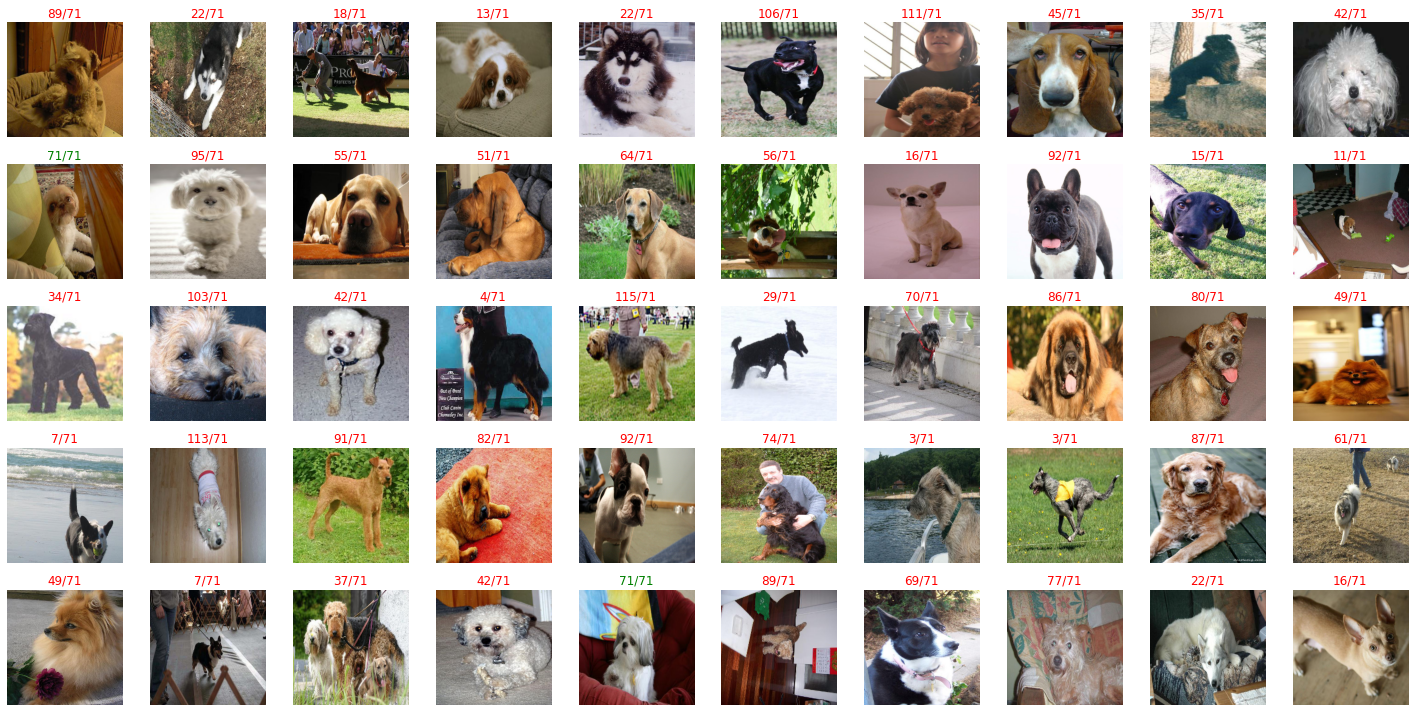

In [34]:
# Prediciendo
r, c = 5, 10
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test'])-1)
        img, label = dataset['test'][ix]
        y_hat = model(img.unsqueeze(0).to(device))
        lab = torch.argmax(y_hat, axis=1)[0].item()
        plt.imshow(img.permute(1,2,0))
        plt.title(f'{label}/{lab}', color="red" if label != lab else "green")
        plt.axis("off")
plt.tight_layout()
plt.show()

# Sección ResNet basico 

1.   Elemento de la lista
2.   Elemento de la lista



In [ ]:
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class Model(torch.nn.Module):
  def __init__(self, n_classes, n_channels=3):
    super().__init__()
    self.conv1 = block(n_channels, 8) # 224->112
    self.conv2 = block(8, 16)        # 112->56
    self.conv3 = block(16, 32)       # 56->28
    self.conv4 = block(32, 64)       # 28->14
    self.conv5 = block(64, 128)      # 17->7
    self.fc1 = block2(128*7*7, 1000)
    # self.fc2_loc = torch.nn.Linear(100, 4)
    self.fc2_cls = torch.nn.Linear(1000, n_classes)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    # x_loc = self.fc2_loc(x)
    x_cls = self.fc2_cls(x)
    return x_cls

In [ ]:
# Instanciamos el modelo y pasamos un tensor
model = Model(n_classes = len(classes))
# output_loc, output_cls = model(torch.randn(64, 3, 224, 224))
output_cls = model(torch.randn(64, 3, 224, 224))
output_cls.shape

torch.Size([64, 120])

In [ ]:
# Entrenamos en modelo instanciando la clase RestNet
model = Model(n_classes = len(classes))
fit(model, dataloader, epochs=40)

val_loss 4.68988 val_acc 0.02264: 100%|██████████| 65/65 [00:25<00:00,  2.54it/s]


Epoch 1/40 loss 4.77714 val_loss 4.68988 acc 0.01213 val_acc 0.02264


val_loss 4.52531 val_acc 0.03558: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]


Epoch 2/40 loss 4.56936 val_loss 4.52531 acc 0.02659 val_acc 0.03558


val_loss 4.44572 val_acc 0.04476: 100%|██████████| 65/65 [00:24<00:00,  2.66it/s]


Epoch 3/40 loss 4.45586 val_loss 4.44572 acc 0.04033 val_acc 0.04476


val_loss 4.40285 val_acc 0.04668: 100%|██████████| 65/65 [00:24<00:00,  2.63it/s]


Epoch 4/40 loss 4.34008 val_loss 4.40285 acc 0.05499 val_acc 0.04668


val_loss 4.29370 val_acc 0.06163: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]


Epoch 5/40 loss 4.20339 val_loss 4.29370 acc 0.07458 val_acc 0.06163


val_loss 4.27692 val_acc 0.06865: 100%|██████████| 65/65 [00:25<00:00,  2.59it/s]


Epoch 6/40 loss 4.06615 val_loss 4.27692 acc 0.09233 val_acc 0.06865


val_loss 4.28198 val_acc 0.06913: 100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


Epoch 7/40 loss 3.95142 val_loss 4.28198 acc 0.11213 val_acc 0.06913


val_loss 4.30169 val_acc 0.07654: 100%|██████████| 65/65 [00:24<00:00,  2.67it/s]


Epoch 8/40 loss 3.81038 val_loss 4.30169 acc 0.13534 val_acc 0.07654


val_loss 4.30810 val_acc 0.07793: 100%|██████████| 65/65 [00:25<00:00,  2.59it/s]


Epoch 9/40 loss 3.65767 val_loss 4.30810 acc 0.16252 val_acc 0.07793


val_loss 4.37272 val_acc 0.07433: 100%|██████████| 65/65 [00:24<00:00,  2.60it/s]


Epoch 10/40 loss 3.48147 val_loss 4.37272 acc 0.19407 val_acc 0.07433


val_loss 4.55181 val_acc 0.07216: 100%|██████████| 65/65 [00:25<00:00,  2.54it/s]


Epoch 11/40 loss 3.27909 val_loss 4.55181 acc 0.22891 val_acc 0.07216


val_loss 4.63719 val_acc 0.07606: 100%|██████████| 65/65 [00:25<00:00,  2.56it/s]


Epoch 12/40 loss 3.03703 val_loss 4.63719 acc 0.27194 val_acc 0.07606


val_loss 4.80181 val_acc 0.07822: 100%|██████████| 65/65 [00:25<00:00,  2.57it/s]


Epoch 13/40 loss 2.78185 val_loss 4.80181 acc 0.32250 val_acc 0.07822


val_loss 5.07386 val_acc 0.08587: 100%|██████████| 65/65 [00:25<00:00,  2.54it/s]


Epoch 14/40 loss 2.48521 val_loss 5.07386 acc 0.38922 val_acc 0.08587


val_loss 5.35842 val_acc 0.08274: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]


Epoch 15/40 loss 2.18051 val_loss 5.35842 acc 0.45024 val_acc 0.08274


val_loss 5.73844 val_acc 0.07644: 100%|██████████| 65/65 [00:25<00:00,  2.52it/s]


Epoch 16/40 loss 1.85103 val_loss 5.73844 acc 0.53267 val_acc 0.07644


val_loss 6.27290 val_acc 0.07361: 100%|██████████| 65/65 [00:25<00:00,  2.59it/s]


Epoch 17/40 loss 1.52272 val_loss 6.27290 acc 0.60686 val_acc 0.07361


val_loss 7.06057 val_acc 0.07308: 100%|██████████| 65/65 [00:24<00:00,  2.62it/s]


Epoch 18/40 loss 1.18210 val_loss 7.06057 acc 0.69302 val_acc 0.07308


val_loss 7.85071 val_acc 0.06755: 100%|██████████| 65/65 [00:25<00:00,  2.59it/s]


Epoch 19/40 loss 0.88754 val_loss 7.85071 acc 0.76588 val_acc 0.06755


val_loss 8.86643 val_acc 0.07212: 100%|██████████| 65/65 [00:23<00:00,  2.71it/s]


Epoch 20/40 loss 0.62932 val_loss 8.86643 acc 0.83766 val_acc 0.07212


val_loss 9.65105 val_acc 0.06851: 100%|██████████| 65/65 [00:24<00:00,  2.66it/s]


Epoch 21/40 loss 0.43390 val_loss 9.65105 acc 0.88744 val_acc 0.06851


val_loss 10.75684 val_acc 0.06875: 100%|██████████| 65/65 [00:24<00:00,  2.64it/s]


Epoch 22/40 loss 0.28754 val_loss 10.75684 acc 0.92746 val_acc 0.06875


val_loss 11.65504 val_acc 0.07187: 100%|██████████| 65/65 [00:25<00:00,  2.59it/s]


Epoch 23/40 loss 0.19845 val_loss 11.65504 acc 0.95244 val_acc 0.07187


val_loss 12.11281 val_acc 0.06803: 100%|██████████| 65/65 [00:25<00:00,  2.58it/s]


Epoch 24/40 loss 0.17135 val_loss 12.11281 acc 0.95848 val_acc 0.06803


val_loss 12.68088 val_acc 0.07308: 100%|██████████| 65/65 [00:25<00:00,  2.57it/s]


Epoch 25/40 loss 0.17988 val_loss 12.68088 acc 0.95355 val_acc 0.07308


val_loss 13.13569 val_acc 0.06904: 100%|██████████| 65/65 [00:24<00:00,  2.64it/s]


Epoch 26/40 loss 0.13495 val_loss 13.13569 acc 0.96661 val_acc 0.06904


val_loss 13.43421 val_acc 0.06760: 100%|██████████| 65/65 [00:24<00:00,  2.63it/s]


Epoch 27/40 loss 0.13503 val_loss 13.43421 acc 0.96716 val_acc 0.06760


val_loss 13.87870 val_acc 0.07212: 100%|██████████| 65/65 [00:25<00:00,  2.54it/s]


Epoch 28/40 loss 0.10552 val_loss 13.87870 acc 0.97414 val_acc 0.07212


val_loss 14.14277 val_acc 0.06971: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]


Epoch 29/40 loss 0.11000 val_loss 14.14277 acc 0.97111 val_acc 0.06971


val_loss 14.10415 val_acc 0.07308: 100%|██████████| 65/65 [00:24<00:00,  2.62it/s]


Epoch 30/40 loss 0.11188 val_loss 14.10415 acc 0.97247 val_acc 0.07308


val_loss 14.32312 val_acc 0.07308: 100%|██████████| 65/65 [00:24<00:00,  2.63it/s]


Epoch 31/40 loss 0.11504 val_loss 14.32312 acc 0.97257 val_acc 0.07308


val_loss 14.60835 val_acc 0.07476: 100%|██████████| 65/65 [00:24<00:00,  2.60it/s]


Epoch 32/40 loss 0.08093 val_loss 14.60835 acc 0.98151 val_acc 0.07476


val_loss 14.64473 val_acc 0.07212: 100%|██████████| 65/65 [00:26<00:00,  2.48it/s]


Epoch 33/40 loss 0.07162 val_loss 14.64473 acc 0.98601 val_acc 0.07212


val_loss 14.87949 val_acc 0.06923: 100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


Epoch 34/40 loss 0.06557 val_loss 14.87949 acc 0.98698 val_acc 0.06923


val_loss 14.85411 val_acc 0.06587: 100%|██████████| 65/65 [00:24<00:00,  2.62it/s]


Epoch 35/40 loss 0.09569 val_loss 14.85411 acc 0.97753 val_acc 0.06587


val_loss 14.60643 val_acc 0.06683: 100%|██████████| 65/65 [00:25<00:00,  2.57it/s]


Epoch 36/40 loss 0.11994 val_loss 14.60643 acc 0.96867 val_acc 0.06683


val_loss 15.06274 val_acc 0.07308: 100%|██████████| 65/65 [00:24<00:00,  2.62it/s]


Epoch 37/40 loss 0.09211 val_loss 15.06274 acc 0.97715 val_acc 0.07308


val_loss 14.88148 val_acc 0.06755: 100%|██████████| 65/65 [00:24<00:00,  2.61it/s]


Epoch 38/40 loss 0.06717 val_loss 14.88148 acc 0.98583 val_acc 0.06755


val_loss 14.92284 val_acc 0.07428: 100%|██████████| 65/65 [00:25<00:00,  2.57it/s]


Epoch 39/40 loss 0.05641 val_loss 14.92284 acc 0.98807 val_acc 0.07428


val_loss 15.26911 val_acc 0.07457: 100%|██████████| 65/65 [00:24<00:00,  2.60it/s]

Epoch 40/40 loss 0.04628 val_loss 15.26911 acc 0.99213 val_acc 0.07457


In [30]:
# Evaluamos el modelo con los datos de evaluacion o test
model.to(device)
model.eval()
with torch.no_grad():
  bar = tqdm(dataloader['test'])
  test_acc = []
  for imgs, labs in bar:
    imgs, labs = imgs.to(device), labs.to(device)
    y_hat = model(imgs)
    acc = (torch.argmax(y_hat, axis=1) == labs).sum().item() / len(labs)
    test_acc.append(acc)
  print(f' acc {np.mean(test_acc):.5f}')

100%|██████████| 65/65 [00:23<00:00,  2.73it/s]

 acc 0.01034


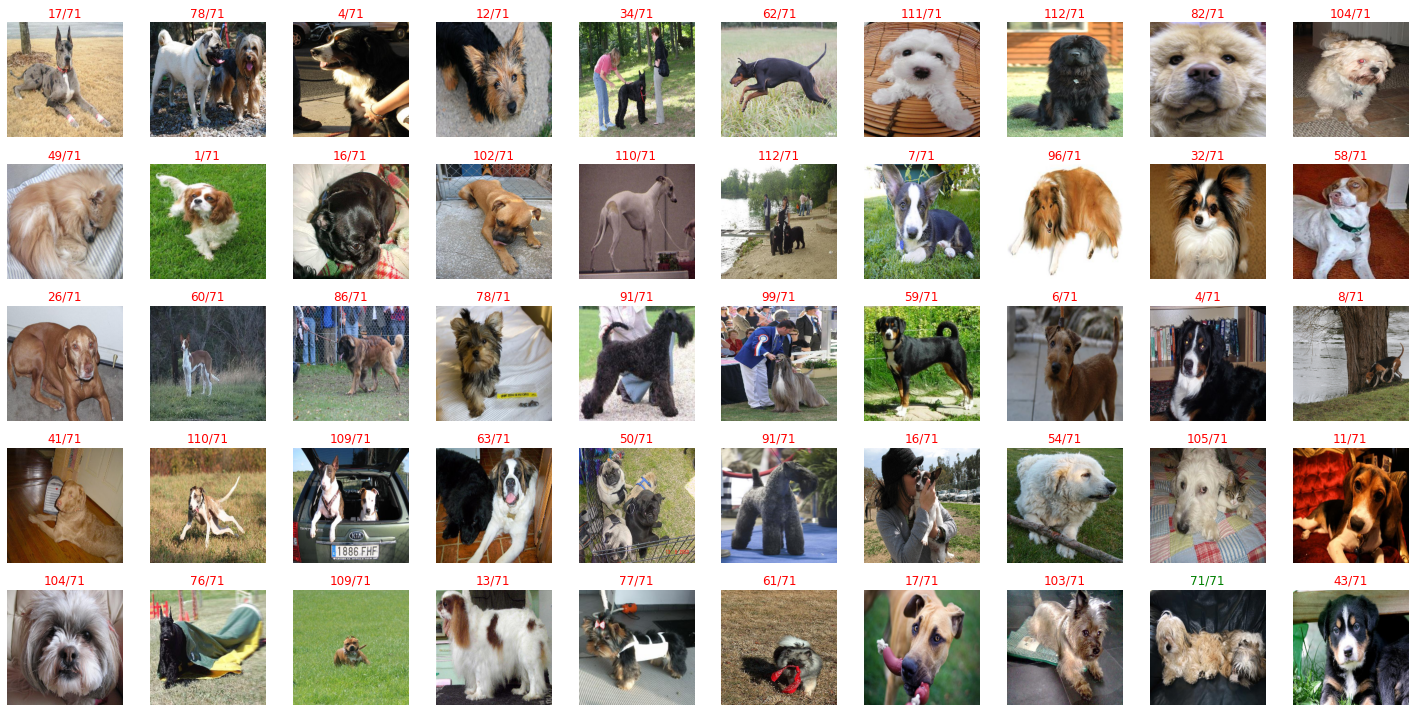

In [31]:
# Prediciendo
r, c = 5, 10
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test'])-1)
        img, label = dataset['test'][ix]
        y_hat = model(img.unsqueeze(0).to(device))
        lab = torch.argmax(y_hat, axis=1)[0].item()
        plt.imshow(img.permute(1,2,0))
        plt.title(f'{label}/{lab}', color="red" if label != lab else "green")
        plt.axis("off")
plt.tight_layout()
plt.show()

# Sección ModeloBasico muy simple demasiado

In [41]:
def blockB(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2B(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.ReLU()
    )

class ModelBasico(torch.nn.Module):
  def __init__(self, n_classes, n_channels=3):
    super().__init__()
    self.conv1 = blockB(n_channels, 8) # 224->112
    self.conv2 = blockB(8, 16)        # 112->56
    self.conv3 = blockB(16, 32)       # 56->28
    # self.conv4 = blockB(32, 64)       # 28->14
    # self.conv5 = blockB(64, 128)      # 17->7
    self.fc1 = block2B(128*14*14, 100)
    # self.fc2_loc = torch.nn.Linear(100, 4)
    self.fc2_cls = torch.nn.Linear(100, n_classes)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    # x = self.conv4(x)
    # x = self.conv5(x)
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    # x_loc = self.fc2_loc(x)
    x_cls = self.fc2_cls(x)
    return x_cls

In [42]:
# Instanciamos el modelo y pasamos un tensor
model = ModelBasico(n_classes = len(classes))
# output_loc, output_cls = model(torch.randn(64, 3, 224, 224))
output_cls = model(torch.randn(64, 3, 224, 224))
output_cls.shape

torch.Size([64, 120])

In [ ]:
# Entrenamos en modelo instanciando la clase RestNet
model = ModelBasico(n_classes = len(classes))
fit(model, dataloader, epochs=5)

loss 4.79313 acc 0.00907:  31%|███▏      | 81/258 [00:36<01:14,  2.36it/s]

In [ ]:
# Evaluamos el modelo con los datos de evaluacion o test
model.to(device)
model.eval()
with torch.no_grad():
  bar = tqdm(dataloader['test'])
  test_acc = []
  for imgs, labs in bar:
    imgs, labs = imgs.to(device), labs.to(device)
    y_hat = model(imgs)
    acc = (torch.argmax(y_hat, axis=1) == labs).sum().item() / len(labs)
    test_acc.append(acc)
  print(f' acc {np.mean(test_acc):.5f}')

In [ ]:
# Prediciendo
r, c = 5, 10
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(dataset['test'])-1)
        img, label = dataset['test'][ix]
        y_hat = model(img.unsqueeze(0).to(device))
        lab = torch.argmax(y_hat, axis=1)[0].item()
        plt.imshow(img.permute(1,2,0))
        plt.title(f'{label}/{lab}', color="red" if label != lab else "green")
        plt.axis("off")
plt.tight_layout()
plt.show()